# Chapter2-Analysis of Stress(Equlibrium) 

In [1]:
import math
#find the new stress tensor tau
import numpy as np
import numpy
from numpy import linalg
## initialization of variables

tau=np.array([[200, 500, -100],
       [500, -300, 300],
       [-100, 300, 50]]) ## some units
print('stress matrix',tau)

a,b,c=30,90,120
d,e,f=90,0,90
g,h,i=60,90,30

##calculations
theta1=np.pi/180
a=([[math.cos(a*theta1), math.cos(b*theta1), math.cos(c*theta1)],
    [math.cos(d*theta1), math.cos(e*theta1), math.cos(f*theta1)],
    [math.cos(g*theta1), math.cos(h*theta1), math.cos(i*theta1)]])
print('direction cosine matrix',a)
b=numpy.transpose(a)
print(b)
tau_new=numpy.dot(a,tau)
tau_new1=numpy.dot(tau_new,b)
## Results
print('The new stress tensor is')
print(tau_new1)

stress matrix [[ 200  500 -100]
 [ 500 -300  300]
 [-100  300   50]]
direction cosine matrix [[0.8660254037844387, 6.123233995736766e-17, -0.4999999999999998], [6.123233995736766e-17, 1.0, 6.123233995736766e-17], [0.5000000000000001, 6.123233995736766e-17, 0.8660254037844387]]
[[ 8.66025404e-01  6.12323400e-17  5.00000000e-01]
 [ 6.12323400e-17  1.00000000e+00  6.12323400e-17]
 [-5.00000000e-01  6.12323400e-17  8.66025404e-01]]
The new stress tensor is
[[ 249.10254038  283.01270189   14.95190528]
 [ 283.01270189 -300.          509.80762114]
 [  14.95190528  509.80762114    0.89745962]]


In [2]:
## stress invariants :old 
I1=tau[0,0]+tau[1,1]+tau[2,2]
I2=tau[0,0]*tau[1,1]+tau[1,1]*tau[2,2]+tau[2,2]*tau[0,0]-(tau[0,1]**2+tau[1,2]**2+tau[2,0]**2)
I3=tau[0,0]*tau[1,1]*tau[2,2]+2*tau[0,1]*tau[1,2]*tau[2,0]-(tau[0,0]*tau[1,2]**2+tau[1,1]*tau[2,0]**2+tau[2,2]*tau[0,1]**2)

## stress invariants :new
I11=tau_new1[0,0]+tau_new1[1,1]+tau_new1[2,2]
I22=tau_new1[0,0]*tau_new1[1,1]+tau_new1[1,1]*tau_new1[2,2]+tau_new1[2,2]*tau_new1[0,0]-(tau_new1[0,1]**2+tau_new1[1,2]**2+tau_new1[2,0]**2)
I33=tau_new1[0,0]*tau_new1[1,1]*tau_new1[2,2]+2*tau_new1[0,1]*tau_new1[1,2]*tau_new1[2,0]-(tau_new1[0,0]*tau_new1[1,2]**2+tau_new1[1,1]*tau_new1[2,0]**2+tau_new1[2,2]*tau_new1[0,1]**2)


In [3]:
print(I1,I2,I3)

-50 -415000 -60500000


In [4]:
print(I11,I22,I33)

-49.99999999999981 -415000.0 -60499999.99999999


In [5]:
coeff = [1, -I1, I2, -I3]
print(np.roots(coeff))

[-730.96875011  522.59075474  158.37799537]


In [6]:
roots=np.roots(coeff)
roots=np.sort(roots)
sigma=roots[::-1]
sigma

array([ 522.59075474,  158.37799537, -730.96875011])

In [7]:
sig_oct=I1/3
sig_oct

-16.666666666666668

In [8]:
tau_oct=1/3.*math.sqrt((sigma[0]-sigma[1])**2+(sigma[1]-sigma[2])**2+(sigma[2]-sigma[0])**2)
tau_oct

526.5189666310437

In [9]:
tau_13=(sigma[0]-sigma[2])/2
tau_13

626.7797524265811

In [10]:
def eigen(m):
    w,v = np.linalg.eig(m)
    print('eigen values:',w)
    print('eigen vectors:',v)

In [11]:
eigen(tau)

eigen values: [-730.96875011  522.59075474  158.37799537]
eigen vectors: [[ 0.47028901 -0.80891524 -0.35282343]
 [-0.80199    -0.55858127  0.21165775]
 [ 0.36829374 -0.18342055  0.91143657]]


In [12]:
eigen(tau_new1)

eigen values: [-730.96875011  158.37799537  522.59075474]
eigen vectors: [[ 0.22313536 -0.76127234  0.60883087]
 [-0.80199     0.21165775  0.55858127]
 [ 0.55409624  0.61291551  0.56330448]]


In [13]:
## Finding about the circles
C11=(sigma[1]+sigma[2])/2
C21=(sigma[0]+sigma[2])/2
C31=(sigma[0]+sigma[1])/2
C12=0
C22=0
C32=0
R1=(sigma[1]-sigma[2])/2
R2=(sigma[0]-sigma[2])/2
R3=(sigma[0]-sigma[1])/2



#SnnA=lA**2.*sigma[0]+mA**2.*sigma[1]+nA**2.*sigma[2]
#SnsA=math.sqrt(lA**2*sigma[0]**2+mA**2*sigma[1]**2+nA**2*sigma[2]**2-SnnA**2)
#SnnB=lB**2*sigma[0]+mB**2*sigma[1]+nB**2*sigma[2]
#SnsB=math.sqrt(lB**2*sigma[0]**2+mB**2*sigma[1]**2+nB**2*sigma[2]**2-SnnB**2)
print('\n The details of circles are given below')
print('\n C1 : ',C11,' M Pa'and  '',C12,'R1' and  '',R1,' M Pa \n')
print('\n C2 : ',C21,' M Pa'and  '',C22,'R2' and  '',R2,' M Pa \n')
print('\n C3 : ',C31,' M Pa'and  '',C32,'R3' and  '',R3,' M Pa \n')

#print('\n at point A')
#print('\n Normal stress = ',SnnA-74,' M Pa' and 'shear stress = ',SnsA+54,' M Pa')
#print('\n at point B')
#print('\n Normal stress = ',SnnB,' M Pa' and 'shear stress = ',SnsB,' M Pa')


 The details of circles are given below

 C1 :  -286.29537737006797  0  444.6733727429579  M Pa 


 C2 :  -104.18899768644468  0  626.7797524265811  M Pa 


 C3 :  340.4843750565132  0  182.1063796836233  M Pa 



In [19]:
import matplotlib.pyplot as plt

#define circles
c1=plt.Circle((C11, C12), radius=R1)
c2=plt.Circle((C21, C22), radius=R2)
c3=plt.Circle((C31, C32), radius=R3)
plt.show()


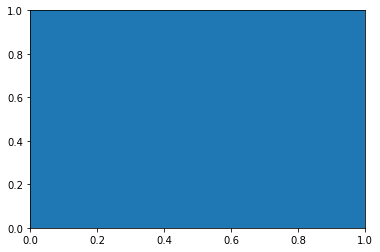

In [15]:
#add circles to plot
plt.gca().add_artist(c1)
#plt.gca().add_artist(c2)
#plt.gca().add_artist(c3)

In [16]:
sigma_max=200
tau_given=sigma_max/2
FOS=tau_given/tau_13


## Ex4-pg54

In [17]:
import math
#find the new stress tensor tau
import numpy
from numpy import linalg
## initialization of variables

tau=([[200, 100, 0],
      [100, 0, 0],
      [0 ,0, 500]]) ## some units
theta=60. ## degrees
##calculations
theta1=theta/57.3
a=([[math.cos(theta1), math.sin(theta1), 0],
    [-math.sin(theta1), math.cos(theta1), 0],
    [0, 0, 1]])
b=numpy.transpose(a)
tau_new=numpy.dot(a,tau)
tau_new1=numpy.dot(tau_new,b)
## Results
print('The new stress tensor is')
print tau_new1

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(tau_new1)? (<ipython-input-17-72cf46fa926a>, line 21)

## Ex5-pg61

In [ ]:
find the octahedral at this point
## initialization of variables
import math
sigma_1=100. ##kg*f/cm^2
sigma_2=100. ##kg*f/cm^2
sigma_3=-200. ##kg*f/cm^2
## calculations
tau_oct=1/3.*math.sqrt((sigma_1-sigma_2)**2+(sigma_2-sigma_3)**2+(sigma_3-sigma_1)**2)
## Results
print'%s %.2f %s '%('Octahedra shear stress at the point is=',tau_oct,' kgf/cm^2')


## Ex7-pg61

In [ ]:
import math
#check whether the invariants of stress sensor
import numpy
from numpy import linalg
## initialization of variable
tau=numpy.matrix([[200, 100, 0],
     [100, 0, 0],
     [0, 0, 500]]) ## some units
theta=60. ## degrees
##calculations
theta=theta*math.pi/180.
a=numpy.matrix([[math.cos(theta), math.sin(theta), 0],
  [-math.sin(theta), math.cos(theta), 0],
   [0, 0, 1]])
b=numpy.transpose(a)
tau_new=numpy.dot(a,tau)
tau_new1=numpy.dot(tau_new,b)

## stress invariants :old 
I1=tau[0,0]+tau[1,1]+tau[2,2]
I2=tau[0,0]*tau[1,1]+tau[1,1]*tau[2,2]+tau[2,2]*tau[0,0]-(tau[0,1]**2+tau[1,2]**2+tau[2,0]**2)
I3=tau[0,0]*tau[1,1]*tau[2,2]+2*tau[0,1]*tau[1,2]*tau[2,0]-(tau[0,0]*tau[1,2]**2+tau[1,1]*tau[2,0]**2+tau[2,2]*tau[0,1]**2)

## stress invariants :new
I11=tau_new1[0,0]+tau_new1[0,0]+tau_new1[1,1]
I22=tau_new1[0,0]*tau_new1[1,1]+tau_new1[1,1]*tau_new1[2,2]+tau_new1[1,1]*tau_new1[0,0]-[tau_new1[0,1]**2+tau_new1[1,2]**2+tau_new1[1,0]**2]
I33=tau_new1[0,0]*tau_new1[1,1]*tau_new1[2,2]+2*tau_new1[0,1]*tau_new1[1,2]*tau_new1[2,0]-[tau_new1[0,0]*tau_new1[1,2]**2+tau_new1[1,1]*tau_new1[2,0]**2+tau_new1[2,2]*tau_new1[0,1]**2]

## Results
print'%s %.2f %s %.2f %s %.2f %s %.2f %s %.2f %s %.2f' %('The invariants of old stress tensor are I1=',I1,' I2=',I2,' I3=',I3,' \n and that of the new stress tensor are I1=',I11,' I2=',I22,' I3=',I33)

print('\n Hence the same stress tensor invariants')





## Ex8-pg67

In [ ]:
import math
## initialization of variables
#find the value of sigma 1 and sigma2 at biaxial yeilding and unaxial
sigma_3=0. ## kgf/cm**2
tau_oct=1500. ## kgf/cm**2
n=2 ## given that sigma_1=n*sigma_2
## calculations
sigma_2=1500.*3./(math.sqrt(2*n**2-2*n+2)) ## ## kgf/cm**2
sigma_1=n*sigma_2 ## kgf/cm**2 
sigma_0=4500./math.sqrt(2.) ## kgf/cm**2
## Results
print'%s %.2f %s %.2f %s %.2f %s  '%('The necessary stresses sigma_1, sigma_2 for biaxial yielding are \n ',sigma_2,' kgf/cm^2' '',sigma_1,' kgf/cm^2' and 'for uniaxial yielding sigma_0 ',sigma_0,'kgf/cm^2.')
                    




## Ex9-pg68

In [ ]:
import math
##initialization of variables
#find the magnitude and direction of principal stress for the a b c
## part (a)
tau_xx=300 ## kgf/cm**2
tau_yy=0 ## kgf/cm**2
tau_xy=600 ## kgf/cm**2
##calculations
sigma_1=(tau_xx+tau_yy)/2.+math.sqrt((1./2.*(tau_xx-tau_yy))**2+tau_xy**2)
sigma_2=(tau_xx+tau_yy)/2-math.sqrt((1/2.*(tau_xx-tau_yy))**2+tau_xy**2)
Beta=math.atan(2*tau_xy/(tau_xx-tau_yy))
Beta=Beta*180/math.pi
##Results
print'%s %.2f%s %.2f %s %.2f %s'%('\n Part (a) \n The magnitude of principal stresses are',sigma_1,''and '',sigma_2,'kgf/cm^2' and' \n the direction is given by 2*beta=',Beta,'')


##part (b)
tau_xx=1000 ## kgf/cm**2
tau_yy=150 ## kgf/cm**2
tau_xy=450 ## kgf/cm**2
## calculations
sigma_1=(tau_xx+tau_yy)/2+math.sqrt((1/2*(tau_xx-tau_yy))**2+tau_xy**2)
sigma_2=(tau_xx+tau_yy)/2-math.sqrt((1/2*(tau_xx-tau_yy))**2+tau_xy**2)
Beta=math.atan(2*tau_xy/(tau_xx-tau_yy))
Beta1=Beta*180./math.pi
## Results
print'%s %.2f %s  %.2f %s %.2f %s '%('\n Part (b) \n The magnitude of principal stresses are',sigma_1,''and '',sigma_2,'kgf/cm^2' and' \n the direction is given by 2*beta=',Beta1,'')

## part (c)
tau_xx=-850 ## kgf/cm**2
tau_yy=350 ## kgf/cm**2
tau_xy=700 ## kgf/cm**2
## calculations
sigma_1=(tau_xx+tau_yy)/2+math.sqrt((1/2*(tau_xx-tau_yy))**2+tau_xy**2)
sigma_2=(tau_xx+tau_yy)/2-math.sqrt((1/2*(tau_xx-tau_yy))**2+tau_xy**2)
Beta=math.atan(2*tau_xy/(tau_xx-tau_yy))
Beta=Beta*57.3
## Results
print'%s %.2f %s %.2f %s %.2f %s '%('\n Part (c) \n The magnitude of principal stresses are',sigma_1,''and '',sigma_2,'kgf/cm^2' and' \n the direction is given by 2*beta=',-Beta,'')
                   

## wrong answers were given in textbook for part (b) (c)





## Ex10-pg70

In [ ]:
import  math
# initialization of variables
#find the intensity of diagonal tension
tau_xx= -1 # kgf/cm^2
tau_yy= 0 # kgf/cm^2
tau_xy= 7 # kgf/cm^2
# calculations 
sigma_1=(tau_xx+tau_yy)/2.+math.sqrt((1/2.*(tau_xx-tau_yy))**2+tau_xy**2)
sigma_2=(tau_xx+tau_yy)/2.-math.sqrt((1/2.*(tau_xx-tau_yy))**2+tau_xy**2)
x=sigma_1 # positive one is tension
if(sigma_2>sigma_1):
    x=sigma_2

# Results
print'%s %.2f %s'%('The diagonal tension is ',x,' kgf/cm^2')


## Ex11-pg70

In [ ]:
import math
# initialization of variables
#find the state of stress at the joint
d=2 # m
l=10 # m
t=1 # cm
p=15 # kgf/cm^2
pitch= 2*math.pi #m
##calculations
w=2*math.pi*d/2. # m
theta=math.atan(w/(2*math.pi))
sigma_z=p*d*100./(4.*t)
sigma_th=p*d*100./(2.*t)
sigma_th_new=(sigma_th+sigma_z)/2.+(sigma_th-sigma_z)/2.*math.cos(2*theta)
tau_thz=(sigma_z-sigma_th)*math.sin(2.*theta)/2
# results
print'%s %.2f %s %.2f %s '%('At the junction, the normal and shear stresses are',sigma_th_new,'' and '',-tau_thz,' kgf/cm^2 \n respectively, and the rivets must be designed for this')